# Introduction to Data Analysis in Python
---

### R. Burke Squires
https://github.com/burkesquires

# Outline:

- Pandas
    - Importing Data
    - Removing missing values
    - Fun with Columns
    - Filtering
    - Grouping
    - Plotting
    - Getting data out
    - Reading and writing to Excel

---

# An Introduction to Pandas

** Presentation originally developed by Michael Hansen, modified slightly by Jeff Shelton **

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data both. It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

## Key features:
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

## Data Source

When dealing with numeric matrices and vectors in Python, [NumPy](http://www.numpy.org/) makes life a lot easier.
For more complex data, however, it leaves a lot to be desired.
If you're used to working with [data frames in R](http://www.r-tutor.com/r-introduction/data-frame), doing data analysis directly with NumPy feels like a step back.

Fortunately, some nice folks have written the [Python Data Analysis Library](http://pandas.pydata.org/) (a.k.a. pandas).
Pandas provides an R-like `DataFrame`, produces high quality plots with [matplotlib](http://matplotlib.org/), and integrates nicely with other libraries that expect NumPy arrays.

In this tutorial, we'll go through the basics of pandas using a year's worth of weather data from [Weather Underground](http://www.wunderground.com/).
Pandas has a **lot** of functionality, so we'll only be able to cover a small fraction of what you can do.
Check out the (very readable) [pandas docs](http://pandas.pydata.org/pandas-docs/stable/) if you want to learn more.

In [3]:
from IPython.core.display import HTML
HTML("<iframe src=http://pandas.pydata.org width=800 height=350></iframe>")

## Getting Started

OK, let's get started by importing the pandas library.

In [4]:
!~/anaconda/bin/conda install -y pandas

/bin/sh: 1: /home/melissaa/anaconda/bin/conda: not found


In [5]:
import pandas

Next, let's read in [our data](data/weather_year.csv).
Because it's in a CSV file, we can use pandas' `read_csv` function to pull it directly into a [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).

In [6]:
#looking at real world data, this is weather data

!head data/weather_year.csv

EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity, Mean Humidity, Min Humidity, Max Sea Level PressureIn, Mean Sea Level PressureIn, Min Sea Level PressureIn, Max VisibilityMiles, Mean VisibilityMiles, Min VisibilityMiles, Max Wind SpeedMPH, Mean Wind SpeedMPH, Max Gust SpeedMPH,PrecipitationIn, CloudCover, Events, WindDirDegrees
2012-3-10,56,40,24,24,20,16,74,50,26,30.53,30.45,30.34,10,10,10,13,6,17,0.00,0,,138
2012-3-11,67,49,30,43,31,24,78,53,28,30.37,30.27,30.13,10,10,10,22,7,32,T,1,Rain,163
2012-3-12,71,62,53,59,55,43,90,76,61,30.13,29.99,29.88,10,10,6,24,14,36,0.03,6,Rain,190
2012-3-13,76,63,50,57,53,47,93,66,38,30.12,30.06,29.97,10,10,4,16,5,24,0.00,0,,242
2012-3-14,80,62,44,58,52,43,93,68,42,30.15,30.10,30.04,10,10,10,16,6,22,0.00,0,,202
2012-3-15,79,69,58,61,58,53,90,69,48,30.13,30.08,30.02,10,10,10,31,10,41,0.04,3,Rain-Thunderstorm,209
2012-3-16,75,64,52,57,54,51,100,75,49,30.14,30.10,30.07,10,10,10,14,5,20,T,2,,1

In [7]:
data = pandas.read_csv("data/weather_year.csv")

In [8]:
type(data)

pandas.core.frame.DataFrame

    data = pandas.read_csv?

We can get a summary of the DataFrame by asking for some information:

In [9]:
help(pandas.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
EDT                           366 non-null object
Max TemperatureF              366 non-null int64
Mean TemperatureF             366 non-null int64
Min TemperatureF              366 non-null int64
Max Dew PointF                366 non-null int64
MeanDew PointF                366 non-null int64
Min DewpointF                 366 non-null int64
Max Humidity                  366 non-null int64
 Mean Humidity                366 non-null int64
 Min Humidity                 366 non-null int64
 Max Sea Level PressureIn     366 non-null float64
 Mean Sea Level PressureIn    366 non-null float64
 Min Sea Level PressureIn     366 non-null float64
 Max VisibilityMiles          366 non-null int64
 Mean VisibilityMiles         366 non-null int64
 Min VisibilityMiles          366 non-null int64
 Max Wind SpeedMPH            366 non-null int64
 Mean Wind SpeedMPH           366 non-null int64
 Max G

This gives us a lot of insight. 

- First, we can see that there are 366 rows (entries) -- a year and a day's worth of weather. Each column is printed along with however many "non-null" values are present.
- We'll talk more about [null (or missing) values in pandas](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) later, but for now we can note that only the "Max Gust SpeedMPH" and "Events" columns have fewer than 366 non-null values.
- Lastly, the data types (dtypes) of the columns are printed at the very bottom. We can see that there are 4 `float64`, 16 `int64`, and 3 `object` columns.

In [12]:
len(data)

366

Using `len` on a DataFrame will give you the number of rows. You can get the column names using the `columns` property.

In [13]:
data.columns

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

Columns can be accessed in two ways. The first is using the DataFrame like a dictionary with string keys:

In [14]:
data["EDT"]

0      2012-3-10
1      2012-3-11
2      2012-3-12
3      2012-3-13
4      2012-3-14
5      2012-3-15
6      2012-3-16
7      2012-3-17
8      2012-3-18
9      2012-3-19
10     2012-3-20
11     2012-3-21
12     2012-3-22
13     2012-3-23
14     2012-3-24
15     2012-3-25
16     2012-3-26
17     2012-3-27
18     2012-3-28
19     2012-3-29
20     2012-3-30
21     2012-3-31
22      2012-4-1
23      2012-4-2
24      2012-4-3
25      2012-4-4
26      2012-4-5
27      2012-4-6
28      2012-4-7
29      2012-4-8
         ...    
336     2013-2-9
337    2013-2-10
338    2013-2-11
339    2013-2-12
340    2013-2-13
341    2013-2-14
342    2013-2-15
343    2013-2-16
344    2013-2-17
345    2013-2-18
346    2013-2-19
347    2013-2-20
348    2013-2-21
349    2013-2-22
350    2013-2-23
351    2013-2-24
352    2013-2-25
353    2013-2-26
354    2013-2-27
355    2013-2-28
356     2013-3-1
357     2013-3-2
358     2013-3-3
359     2013-3-4
360     2013-3-5
361     2013-3-6
362     2013-3-7
363     2013-3

You can get multiple columns out at the same time by passing in a list of strings.

In [15]:
data[["EDT", "Mean TemperatureF"]]

,EDT,Mean TemperatureF
0,2012-3-10,40
1,2012-3-11,49
2,2012-3-12,62
3,2012-3-13,63
4,2012-3-14,62
5,2012-3-15,69
6,2012-3-16,64
7,2012-3-17,62
8,2012-3-18,70
9,2012-3-19,72


## Dot Notation

The second way to access columns is using the dot syntax. This only works if:
- your column name could also be a Python variable name (i.e., no spaces), and 
- if it doesn't collide with another DataFrame property or function name (e.g., count, sum).

In [16]:
data.EDT

0      2012-3-10
1      2012-3-11
2      2012-3-12
3      2012-3-13
4      2012-3-14
5      2012-3-15
6      2012-3-16
7      2012-3-17
8      2012-3-18
9      2012-3-19
10     2012-3-20
11     2012-3-21
12     2012-3-22
13     2012-3-23
14     2012-3-24
15     2012-3-25
16     2012-3-26
17     2012-3-27
18     2012-3-28
19     2012-3-29
20     2012-3-30
21     2012-3-31
22      2012-4-1
23      2012-4-2
24      2012-4-3
25      2012-4-4
26      2012-4-5
27      2012-4-6
28      2012-4-7
29      2012-4-8
         ...    
336     2013-2-9
337    2013-2-10
338    2013-2-11
339    2013-2-12
340    2013-2-13
341    2013-2-14
342    2013-2-15
343    2013-2-16
344    2013-2-17
345    2013-2-18
346    2013-2-19
347    2013-2-20
348    2013-2-21
349    2013-2-22
350    2013-2-23
351    2013-2-24
352    2013-2-25
353    2013-2-26
354    2013-2-27
355    2013-2-28
356     2013-3-1
357     2013-3-2
358     2013-3-3
359     2013-3-4
360     2013-3-5
361     2013-3-6
362     2013-3-7
363     2013-3

We'll be mostly using the dot syntax here because you can auto-complete the names in IPython. The first pandas function we'll learn about is `head()`. This gives us the first 5 items in a column (or the first 5 rows in the DataFrame).

In [17]:
data.EDT.head()

0    2012-3-10
1    2012-3-11
2    2012-3-12
3    2012-3-13
4    2012-3-14
Name: EDT, dtype: object

Passing in a number `n` gives us the first `n` items in the column. There is also a corresponding `tail()` method that gives the *last* `n` items or rows.

In [18]:
data[['EDT', 'Max TemperatureF']].max()

EDT                 2013-3-9
Max TemperatureF         106
dtype: object

This also works with the dictionary syntax.

In [19]:
data["Mean TemperatureF"].head()

0    40
1    49
2    62
3    63
4    62
Name: Mean TemperatureF, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
EDT                           366 non-null object
Max TemperatureF              366 non-null int64
Mean TemperatureF             366 non-null int64
Min TemperatureF              366 non-null int64
Max Dew PointF                366 non-null int64
MeanDew PointF                366 non-null int64
Min DewpointF                 366 non-null int64
Max Humidity                  366 non-null int64
 Mean Humidity                366 non-null int64
 Min Humidity                 366 non-null int64
 Max Sea Level PressureIn     366 non-null float64
 Mean Sea Level PressureIn    366 non-null float64
 Min Sea Level PressureIn     366 non-null float64
 Max VisibilityMiles          366 non-null int64
 Mean VisibilityMiles         366 non-null int64
 Min VisibilityMiles          366 non-null int64
 Max Wind SpeedMPH            366 non-null int64
 Mean Wind SpeedMPH           366 non-null int64
 Max G

In [21]:
data[" Mean Humidity"]

0      50
1      53
2      76
3      66
4      68
5      69
6      75
7      78
8      69
9      66
10     58
11     58
12     65
13     79
14     80
15     82
16     64
17     46
18     47
19     55
20     59
21     71
22     75
23     73
24     53
25     74
26     64
27     56
28     52
29     48
       ..
336    67
337    71
338    71
339    66
340    63
341    70
342    66
343    63
344    56
345    61
346    71
347    58
348    71
349    83
350    64
351    64
352    63
353    72
354    87
355    86
356    80
357    72
358    63
359    64
360    80
361    85
362    71
363    65
364    57
365    48
Name:  Mean Humidity, Length: 366, dtype: int64

## Exercise 1:

How would we get the second to last date (EDT) in the dataset?

In [23]:
data.EDT[len(data) -1]

'2013-3-10'

If the data in the column is numeric, you can use `describe()` to get some stats on it.

In [24]:
data["Mean TemperatureF"].describe()

count    366.000000
mean      55.683060
std       18.436506
min       11.000000
25%       41.000000
50%       59.000000
75%       70.750000
max       89.000000
Name: Mean TemperatureF, dtype: float64

In [25]:
data.describe()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,CloudCover,WindDirDegrees
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,366.000000,366.000000
mean,66.803279,55.683060,44.101093,49.549180,44.057377,37.980874,90.027322,67.860656,45.193989,30.108907,30.022705,29.936831,9.994536,8.732240,5.797814,16.418033,6.057377,22.764384,2.885246,189.704918
std,20.361247,18.436506,17.301141,16.397178,16.829996,17.479449,9.108438,9.945591,15.360261,0.172189,0.174112,0.182476,0.073821,1.875406,3.792219,5.564329,3.200940,8.131092,2.707261,94.045080
min,16.000000,11.000000,1.000000,0.000000,-3.000000,-5.000000,54.000000,37.000000,15.000000,29.640000,29.420000,29.230000,9.000000,2.000000,0.000000,6.000000,0.000000,7.000000,0.000000,1.000000
25%,51.000000,41.000000,30.000000,36.000000,30.000000,24.000000,85.000000,61.250000,35.000000,29.990000,29.910000,29.830000,10.000000,8.000000,2.000000,13.000000,4.000000,17.000000,0.000000,131.000000
50%,69.000000,59.000000,47.000000,54.500000,48.000000,41.000000,93.000000,68.000000,42.000000,30.100000,30.020000,29.940000,10.000000,10.000000,6.000000,16.000000,6.000000,22.000000,2.000000,192.500000
75%,84.000000,70.750000,57.750000,62.000000,57.000000,51.000000,96.000000,74.000000,54.000000,30.210000,30.127500,30.040000,10.000000,10.000000,10.000000,20.000000,8.000000,26.000000,5.000000,259.750000
max,106.000000,89.000000,77.000000,77.000000,72.000000,71.000000,100.000000,95.000000,90.000000,30.600000,30.480000,30.440000,10.000000,10.000000,10.000000,39.000000,19.000000,63.000000,8.000000,360.000000


## Fun with Columns

The column names in `data` are a little unwieldy, so we're going to rename them. At first we will automate the renaming but then to make them easier to read we will assigning a new list of column names to the `columns` property of the DataFrame.

In [26]:
data.columns

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

In [27]:
def rename_dataframe_columns(df):
    """
    This functions renames columns by replacing spaces with underscores 
    and making everything lower case
    
    df: pandas dataframe as input
    """
    cols = df.columns
    new_column_names = []

    for col in cols:
        new_col = col.lstrip().lower().replace(" ", "_") #strip beginning spaces, makes lowercase, add underscpre
        new_column_names.append(new_col)

    df.columns = new_column_names

In [28]:
rename_dataframe_columns(data)

In [29]:
data.columns

Index(['edt', 'max_temperaturef', 'mean_temperaturef', 'min_temperaturef',
       'max_dew_pointf', 'meandew_pointf', 'min_dewpointf', 'max_humidity',
       'mean_humidity', 'min_humidity', 'max_sea_level_pressurein',
       'mean_sea_level_pressurein', 'min_sea_level_pressurein',
       'max_visibilitymiles', 'mean_visibilitymiles', 'min_visibilitymiles',
       'max_wind_speedmph', 'mean_wind_speedmph', 'max_gust_speedmph',
       'precipitationin', 'cloudcover', 'events', 'winddirdegrees'],
      dtype='object')

Instead of these names we will just rename all columns with a shorter name:

In [30]:
data.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew",
                "mean_dew", "min_dew", "max_humidity", "mean_humidity",
                "min_humidity", "max_pressure", "mean_pressure",
                "min_pressure", "max_visibilty", "mean_visibility",
                "min_visibility", "max_wind", "mean_wind", "min_wind",
                "precipitation", "cloud_cover", "events", "wind_dir"]

To rename one or more DataFrame columns

    data = data.rename(columns = {

        'col1 old name':'col1 new name',
        'col2 old name':'col2 new name',
        'col3 old name':'col3 new name'
    })

These should be in the same order as the original columns. Let's take another look at our DataFrame summary.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
date               366 non-null object
max_temp           366 non-null int64
mean_temp          366 non-null int64
min_temp           366 non-null int64
max_dew            366 non-null int64
mean_dew           366 non-null int64
min_dew            366 non-null int64
max_humidity       366 non-null int64
mean_humidity      366 non-null int64
min_humidity       366 non-null int64
max_pressure       366 non-null float64
mean_pressure      366 non-null float64
min_pressure       366 non-null float64
max_visibilty      366 non-null int64
mean_visibility    366 non-null int64
min_visibility     366 non-null int64
max_wind           366 non-null int64
mean_wind          366 non-null int64
min_wind           365 non-null float64
precipitation      366 non-null object
cloud_cover        366 non-null int64
events             162 non-null object
wind_dir           366 non-null int64
dtypes: fl

Now our columns can all be accessed using the dot syntax!

In [32]:
data.max_temp.head()

0    56
1    67
2    71
3    76
4    80
Name: max_temp, dtype: int64

There are lots useful methods on columns, such as `std()` to get the standard deviation. Most of pandas' methods will happily ignore missing values like `NaN`.

In [33]:
data.mean_temp.std()

18.436505996251068

Some methods, like `plot()` and `hist()` produce plots using [matplotlib](http://matplotlib.org/).

To make plots using Matplotlib, you must first enable IPython's matplotlib mode. To do this, run the `%matplotlib inline` magic command to enable plotting in the current Notebook. \[If that doesn't work (because you have an older version of IPython), try `%pylab inline`. You may also have to restart the IPython kernel.\]

We'll go over plotting in more detail later.

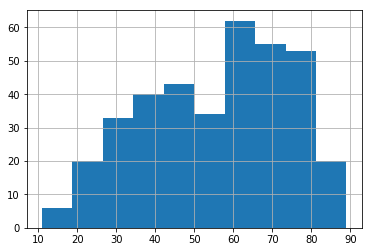

In [34]:
%matplotlib inline
data.mean_temp.hist()

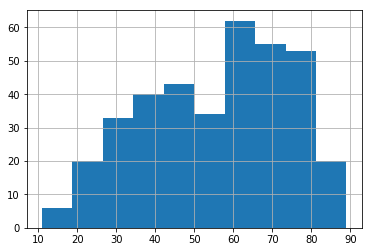

In [35]:
%matplotlib inline

data.mean_temp.hist()

If you want to add labels and save the plot as a `png` file that is sized 800 pixels by 600 pixels:

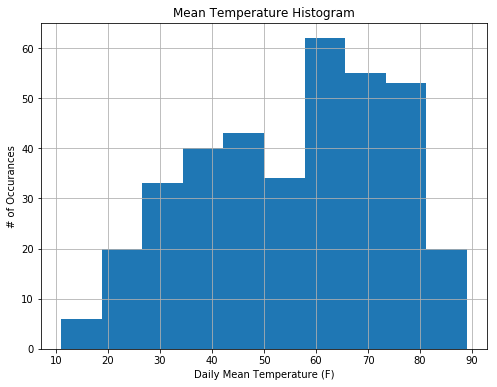

In [36]:
ax = data.mean_temp.hist()   # get plot axes object

ax.set_xlabel('Daily Mean Temperature (F)')
ax.set_ylabel('# of Occurances')
ax.set_title('Mean Temperature Histogram')

fig = ax.get_figure()        # get plot figure object
fig.set_size_inches(8,6)     # set plot size
fig.savefig('/home/melissaa/Desktop/MeanTempHistogram.jpg', dpi=100)

In [37]:
!ls -l

total 6952
-rwxr-xr-x 1 manager manager 7001459 Jul 14 19:10 00_Intro_Python_Programming.pptx
-rwxr-xr-x 1 manager manager    8616 Jul 16 12:05 01_how_to_run_python_code.ipynb
-rwxr-xr-x 1 manager manager   28519 Jul 14 19:10 02_intro_python.ipynb
-rwxr-xr-x 1 manager manager   63282 Jul 14 19:10 03_python_data_analysis.ipynb
drwxr-xr-x 5 manager manager    4096 Jul 14 19:10 biopython-notebook-master
drwxr-xr-x 2 manager manager    4096 Jul 14 19:10 data


In [38]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [39]:
data.mean_temp.hist?

Signature: data.mean_temp.hist(by=None, ax=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, figsize=None, bins=10, **kwds)
Docstring:
Draw histogram of the input series using matplotlib

Parameters
----------
by : object, optional
    If passed, then used to form histograms for separate groups
ax : matplotlib axis object
    If not passed, uses gca()
grid : boolean, default True
    Whether to show axis grid lines
xlabelsize : int, default None
    If specified changes the x-axis label size
xrot : float, default None
    rotation of x axis labels
ylabelsize : int, default None
    If specified changes the y-axis label size
yrot : float, default None
    rotation of y axis labels
figsize : tuple, default None
    figure size in inches by default
bins: integer, default 10
    Number of histogram bins to be used
kwds : keywords
    To be passed to the actual plotting function

Notes
-----
See matplotlib documentation online for more on this
File:      /usr/lib/pyth

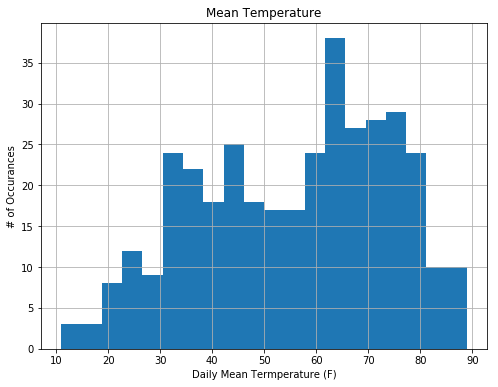

In [40]:
ax = data.mean_temp.hist(bins=20)

ax.set_xlabel("Daily Mean Termperature (F)")
ax.set_ylabel("# of Occurances")
ax.set_title("Mean Temperature")

fig = ax.get_figure()
fig.set_size_inches(8,6)
fig.savefig('/home/melissaa/MeanTemperature.jpg', dpi=300)

By the way, many of the column-specific methods also work on the entire DataFrame. Instead of a single number, you'll get a result for each column.

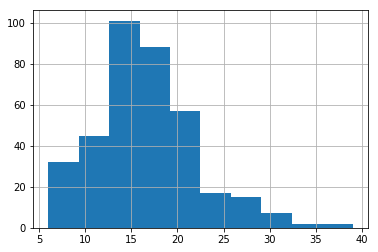

In [41]:
data.max_wind.hist()

## Exercise 2:

What is the range of temperatures in the dataset?

*Hint: columns have `max()` and `min()` methods.*

In [42]:
data.max_temp.max()

106

## Bulk Operations with `apply()`

Methods like `sum()` and `std()` work on entire columns. We can run our own functions across all values in a column (or row) using `apply()`.

To give you an idea of how this works, let's consider the "date" column in our DataFrame (formally "EDT").

In [43]:
data.date.head()

0    2012-3-10
1    2012-3-11
2    2012-3-12
3    2012-3-13
4    2012-3-14
Name: date, dtype: object

We can use the `values` property of the column to get a list of values for the column. Inspecting the first value reveals that these are strings with a particular format.

In [44]:
first_date = data.date.values[0]
first_date

'2012-3-10'

In [45]:
type(first_date)

str

The `strptime` function from the `datetime` module will make quick work of this date string. There are many [more shortcuts available](http://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior) for `strptime`.

In [46]:
# Import the datetime class from the datetime module
from datetime import datetime

# Convert date string to datetime object
datetime.strptime(first_date, "%Y-%m-%d")

datetime.datetime(2012, 3, 10, 0, 0)

Using the `apply()` method, which takes a function (**without** the parentheses), we can apply `strptime` to each value in the column. We'll overwrite the string date values with their Python `datetime` equivalents.

In [47]:
# Define a function to convert strings to dates
def string_to_date(date_string):
    return datetime.strptime(date_string, "%Y-%m-%d")

# Run the function on every date string and overwrite the column
data.date = data.date.apply(string_to_date)
data.date.head()

0   2012-03-10
1   2012-03-11
2   2012-03-12
3   2012-03-13
4   2012-03-14
Name: date, dtype: datetime64[ns]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
date               366 non-null datetime64[ns]
max_temp           366 non-null int64
mean_temp          366 non-null int64
min_temp           366 non-null int64
max_dew            366 non-null int64
mean_dew           366 non-null int64
min_dew            366 non-null int64
max_humidity       366 non-null int64
mean_humidity      366 non-null int64
min_humidity       366 non-null int64
max_pressure       366 non-null float64
mean_pressure      366 non-null float64
min_pressure       366 non-null float64
max_visibilty      366 non-null int64
mean_visibility    366 non-null int64
min_visibility     366 non-null int64
max_wind           366 non-null int64
mean_wind          366 non-null int64
min_wind           365 non-null float64
precipitation      366 non-null object
cloud_cover        366 non-null int64
events             162 non-null object
wind_dir           366 non-null int64
dt

In [49]:
def string_to_date(date_string):
    return datetime.strptime(date_string, "%Y-%m-%d")

In [50]:
data.date.head()

0   2012-03-10
1   2012-03-11
2   2012-03-12
3   2012-03-13
4   2012-03-14
Name: date, dtype: datetime64[ns]

Let's go one step futher. Each row in our DataFrame represents the weather from a single day. Each row in a DataFrame is associated with an *index*, which is a label that uniquely identifies a row.

Our row indices up to now have been auto-generated by pandas, and are simply integers from 0 to 365. If we use dates instead of integers for our index, we will get some extra benefits from pandas when plotting later on. Overwriting the index is as easy as assigning to the `index` property of the DataFrame.

In [51]:
data.index = data.date
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2012-03-10 to 2013-03-10
Data columns (total 23 columns):
date               366 non-null datetime64[ns]
max_temp           366 non-null int64
mean_temp          366 non-null int64
min_temp           366 non-null int64
max_dew            366 non-null int64
mean_dew           366 non-null int64
min_dew            366 non-null int64
max_humidity       366 non-null int64
mean_humidity      366 non-null int64
min_humidity       366 non-null int64
max_pressure       366 non-null float64
mean_pressure      366 non-null float64
min_pressure       366 non-null float64
max_visibilty      366 non-null int64
mean_visibility    366 non-null int64
min_visibility     366 non-null int64
max_wind           366 non-null int64
mean_wind          366 non-null int64
min_wind           365 non-null float64
precipitation      366 non-null object
cloud_cover        366 non-null int64
events             162 non-null object
wind_dir           36

In [52]:
data.index = data.date

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2012-03-10 to 2013-03-10
Data columns (total 23 columns):
date               366 non-null datetime64[ns]
max_temp           366 non-null int64
mean_temp          366 non-null int64
min_temp           366 non-null int64
max_dew            366 non-null int64
mean_dew           366 non-null int64
min_dew            366 non-null int64
max_humidity       366 non-null int64
mean_humidity      366 non-null int64
min_humidity       366 non-null int64
max_pressure       366 non-null float64
mean_pressure      366 non-null float64
min_pressure       366 non-null float64
max_visibilty      366 non-null int64
mean_visibility    366 non-null int64
min_visibility     366 non-null int64
max_wind           366 non-null int64
mean_wind          366 non-null int64
min_wind           365 non-null float64
precipitation      366 non-null object
cloud_cover        366 non-null int64
events             162 non-null object
wind_dir           36

In [54]:
data = data.drop("date", axis=1)
data.columns

Index(['max_temp', 'mean_temp', 'min_temp', 'max_dew', 'mean_dew', 'min_dew',
       'max_humidity', 'mean_humidity', 'min_humidity', 'max_pressure',
       'mean_pressure', 'min_pressure', 'max_visibilty', 'mean_visibility',
       'min_visibility', 'max_wind', 'mean_wind', 'min_wind', 'precipitation',
       'cloud_cover', 'events', 'wind_dir'],
      dtype='object')

Now we can quickly look up a row by its date with the `loc[]` property \[[see docs](http://pandas.pydata.org/pandas-docs/stable/indexing.html)], which locates records by label.

In [55]:
data.loc[datetime(2012, 8, 19)]

max_temp              82
mean_temp             67
min_temp              51
max_dew               56
mean_dew              50
min_dew               42
max_humidity          96
mean_humidity         62
min_humidity          28
max_pressure       29.95
mean_pressure      29.92
min_pressure       29.89
max_visibilty         10
mean_visibility       10
min_visibility        10
max_wind              14
mean_wind              3
min_wind              21
precipitation       0.00
cloud_cover            1
events               NaN
wind_dir               1
Name: 2012-08-19 00:00:00, dtype: object

We can also access a row (or range of rows) with the `iloc[]` property, which locates records by integer index.

In [56]:
data.max_temp.iloc[7:15]

date
2012-03-17    78
2012-03-18    80
2012-03-19    84
2012-03-20    84
2012-03-21    84
2012-03-22    81
2012-03-23    73
2012-03-24    65
Name: max_temp, dtype: int64

With all of the dates in the index now, we no longer need the "date" column. Let's drop it.

In [57]:
data.columns

Index(['max_temp', 'mean_temp', 'min_temp', 'max_dew', 'mean_dew', 'min_dew',
       'max_humidity', 'mean_humidity', 'min_humidity', 'max_pressure',
       'mean_pressure', 'min_pressure', 'max_visibilty', 'mean_visibility',
       'min_visibility', 'max_wind', 'mean_wind', 'min_wind', 'precipitation',
       'cloud_cover', 'events', 'wind_dir'],
      dtype='object')

Note that we need to pass in `axis=1` in order to drop a column. For more details, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) for `drop`. The index values can now be accessed as `data.index.values`.

## Exercise 3:

Print out the cloud cover for each day in May.

*Hint: you can make datetime objects with the `datetime(year, month, day)` function*

*For extra credit, try using the `date_range()` function; see [pandas.date_range](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html)*

In [58]:
datetime(2012, 5, 1)  # May 1st of 2012
print(type(data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [59]:
pandas.date_range?

Signature: pandas.date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None, **kwargs)
Docstring:
Return a fixed frequency DatetimeIndex, with day (calendar) as the default
frequency

Parameters
----------
start : string or datetime-like, default None
    Left bound for generating dates
end : string or datetime-like, default None
    Right bound for generating dates
periods : integer, default None
    Number of periods to generate
freq : string or DateOffset, default 'D' (calendar daily)
    Frequency strings can have multiples, e.g. '5H'
tz : string, default None
    Time zone name for returning localized DatetimeIndex, for example
    Asia/Hong_Kong
normalize : bool, default False
    Normalize start/end dates to midnight before generating date range
name : string, default None
    Name of the resulting DatetimeIndex
closed : string, default None
    Make the interval closed with respect to the given frequency to
    the 'left', 'right'

In [60]:
#data.cloud_cover.loc[datetime(2012, 5, 1)]
rng = pandas.date_range('5/1/2012','5/31/2012',freq='D') 
data.cloud_cover.loc[rng]

2012-05-01    6
2012-05-02    1
2012-05-03    0
2012-05-04    6
2012-05-05    3
2012-05-06    0
2012-05-07    5
2012-05-08    4
2012-05-09    3
2012-05-10    1
2012-05-11    0
2012-05-12    1
2012-05-13    4
2012-05-14    4
2012-05-15    0
2012-05-16    0
2012-05-17    0
2012-05-18    0
2012-05-19    0
2012-05-20    1
2012-05-21    4
2012-05-22    2
2012-05-23    0
2012-05-24    0
2012-05-25    2
2012-05-26    0
2012-05-27    0
2012-05-28    0
2012-05-29    4
2012-05-30    1
2012-05-31    4
Freq: D, Name: cloud_cover, dtype: int64

## Handing Missing Values

Pandas considers values like `NaN` and `None` to represent missing data. The `count()` function [[see docs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html)] can be used to tell whether values are missing. We use the parameter `axis=0` to indicate that we want to perform the count by rows, rather than columns.

In [61]:
data.count(axis=0)

max_temp           366
mean_temp          366
min_temp           366
max_dew            366
mean_dew           366
min_dew            366
max_humidity       366
mean_humidity      366
min_humidity       366
max_pressure       366
mean_pressure      366
min_pressure       366
max_visibilty      366
mean_visibility    366
min_visibility     366
max_wind           366
mean_wind          366
min_wind           365
precipitation      366
cloud_cover        366
events             162
wind_dir           366
dtype: int64

It is pretty obvious that there are a lot of `NaN` entrys for the `events` column; 204 to be exact. Let's take a look at a few values from the `events` column:

In [62]:
data.events.head(10)

date
2012-03-10                  NaN
2012-03-11                 Rain
2012-03-12                 Rain
2012-03-13                  NaN
2012-03-14                  NaN
2012-03-15    Rain-Thunderstorm
2012-03-16                  NaN
2012-03-17     Fog-Thunderstorm
2012-03-18                 Rain
2012-03-19                  NaN
Name: events, dtype: object

This isn't exactly what we want. One option is to drop all rows in the DataFrame with missing "events" values using the `dropna()` function \[[see docs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)].

In [63]:
data.dropna(subset=["events"]).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2012-03-11 to 2013-03-06
Data columns (total 22 columns):
max_temp           162 non-null int64
mean_temp          162 non-null int64
min_temp           162 non-null int64
max_dew            162 non-null int64
mean_dew           162 non-null int64
min_dew            162 non-null int64
max_humidity       162 non-null int64
mean_humidity      162 non-null int64
min_humidity       162 non-null int64
max_pressure       162 non-null float64
mean_pressure      162 non-null float64
min_pressure       162 non-null float64
max_visibilty      162 non-null int64
mean_visibility    162 non-null int64
min_visibility     162 non-null int64
max_wind           162 non-null int64
mean_wind          162 non-null int64
min_wind           162 non-null float64
precipitation      162 non-null object
cloud_cover        162 non-null int64
events             162 non-null object
wind_dir           162 non-null int64
dtypes: float64(4), int64(16),

Note that this didn't affect `data`; we're just looking at a copy.

Instead of dropping rows with missing values, let's fill them with empty strings (you'll see why in a moment). This is easily done with the `fillna()` function. We'll go ahead and overwrite the "events" column with empty string missing values instead of `NaN`.

In [64]:
data.events = data.events.fillna("")
data.events.head(10)

date
2012-03-10                     
2012-03-11                 Rain
2012-03-12                 Rain
2012-03-13                     
2012-03-14                     
2012-03-15    Rain-Thunderstorm
2012-03-16                     
2012-03-17     Fog-Thunderstorm
2012-03-18                 Rain
2012-03-19                     
Name: events, dtype: object

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2012-03-10 to 2013-03-10
Data columns (total 22 columns):
max_temp           366 non-null int64
mean_temp          366 non-null int64
min_temp           366 non-null int64
max_dew            366 non-null int64
mean_dew           366 non-null int64
min_dew            366 non-null int64
max_humidity       366 non-null int64
mean_humidity      366 non-null int64
min_humidity       366 non-null int64
max_pressure       366 non-null float64
mean_pressure      366 non-null float64
min_pressure       366 non-null float64
max_visibilty      366 non-null int64
mean_visibility    366 non-null int64
min_visibility     366 non-null int64
max_wind           366 non-null int64
mean_wind          366 non-null int64
min_wind           365 non-null float64
precipitation      366 non-null object
cloud_cover        366 non-null int64
events             366 non-null object
wind_dir           366 non-null int64
dtypes: float64(4), int64(16),

In [66]:
data.events.head(10)

date
2012-03-10                     
2012-03-11                 Rain
2012-03-12                 Rain
2012-03-13                     
2012-03-14                     
2012-03-15    Rain-Thunderstorm
2012-03-16                     
2012-03-17     Fog-Thunderstorm
2012-03-18                 Rain
2012-03-19                     
Name: events, dtype: object

Now we repeat the `count` function for the `events` column:

In [67]:
data.events.count()

366

As desired, there are no longer any empty entries in the `events` column. Why did we not need the `axis=0` parameter this time?

## Iteratively Accessing Rows

You can iterate over each row in the DataFrame with `iterrows()`. Note that this function returns **both** the index and the row. Also, you must access columns in the row you get back from `iterrows()` with the dictionary syntax.

In [68]:
num_rain = 0
for idx, row in data.iterrows():
    if "Rain" in row["events"]:
        num_rain += 1

"Days with rain: {0}".format(num_rain)

'Days with rain: 121'

In [69]:
num_rain = 0
for idx, row in data.iterrows():
    if "Rain" in row["events"]:
        num_rain += 1

print("Days with rain: {0}".format(num_rain))

Days with rain: 121


## Exercise 4:

Was there any November rain?

*Hint*: check out the `strftime()` function on `datetime` objects and the [documentation](http://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior)

## Filtering

Most of your time using pandas will likely be devoted to selecting rows of interest from a DataFrame. In addition to strings, the dictionary syntax accepts requests like:

In [70]:
data.max_temp <= 32

date
2012-03-10    False
2012-03-11    False
2012-03-12    False
2012-03-13    False
2012-03-14    False
2012-03-15    False
2012-03-16    False
2012-03-17    False
2012-03-18    False
2012-03-19    False
2012-03-20    False
2012-03-21    False
2012-03-22    False
2012-03-23    False
2012-03-24    False
2012-03-25    False
2012-03-26    False
2012-03-27    False
2012-03-28    False
2012-03-29    False
2012-03-30    False
2012-03-31    False
2012-04-01    False
2012-04-02    False
2012-04-03    False
2012-04-04    False
2012-04-05    False
2012-04-06    False
2012-04-07    False
2012-04-08    False
              ...  
2013-02-09    False
2013-02-10    False
2013-02-11    False
2013-02-12    False
2013-02-13    False
2013-02-14    False
2013-02-15    False
2013-02-16     True
2013-02-17    False
2013-02-18    False
2013-02-19    False
2013-02-20     True
2013-02-21    False
2013-02-22    False
2013-02-23    False
2013-02-24    False
2013-02-25    False
2013-02-26    False
2013-02-27    F

In [71]:
# ^ Tells you true or false
# below tells you the rows with the max temp of less or = 32 
# and selected for those records

In [72]:
freezing_days = data[data.max_temp <= 32]
freezing_days.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2012-11-24 to 2013-03-06
Data columns (total 22 columns):
max_temp           21 non-null int64
mean_temp          21 non-null int64
min_temp           21 non-null int64
max_dew            21 non-null int64
mean_dew           21 non-null int64
min_dew            21 non-null int64
max_humidity       21 non-null int64
mean_humidity      21 non-null int64
min_humidity       21 non-null int64
max_pressure       21 non-null float64
mean_pressure      21 non-null float64
min_pressure       21 non-null float64
max_visibilty      21 non-null int64
mean_visibility    21 non-null int64
min_visibility     21 non-null int64
max_wind           21 non-null int64
mean_wind          21 non-null int64
min_wind           21 non-null float64
precipitation      21 non-null object
cloud_cover        21 non-null int64
events             21 non-null object
wind_dir           21 non-null int64
dtypes: float64(4), int64(16), object(2)
memory usage

In [73]:
type(freezing_days)

pandas.core.frame.DataFrame

We get back another DataFrame with fewer rows (21 in this case). This DataFrame can be filtered down even more by adding a constrain that the temperature be greater than 20 degrees, in addition to being below freezing.

In [74]:
freezing_days.min_temp >= 20

date
2012-11-24     True
2012-12-21     True
2012-12-29     True
2012-12-30    False
2013-01-01     True
2013-01-02    False
2013-01-04    False
2013-01-14    False
2013-01-21    False
2013-01-22    False
2013-01-23    False
2013-01-24    False
2013-01-25     True
2013-01-31    False
2013-02-01    False
2013-02-02    False
2013-02-03    False
2013-02-16    False
2013-02-20    False
2013-03-02     True
2013-03-06     True
Name: min_temp, dtype: bool

In [75]:
cold_days = freezing_days[freezing_days.min_temp >= 20]
cold_days.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2012-11-24 to 2013-03-06
Data columns (total 22 columns):
max_temp           7 non-null int64
mean_temp          7 non-null int64
min_temp           7 non-null int64
max_dew            7 non-null int64
mean_dew           7 non-null int64
min_dew            7 non-null int64
max_humidity       7 non-null int64
mean_humidity      7 non-null int64
min_humidity       7 non-null int64
max_pressure       7 non-null float64
mean_pressure      7 non-null float64
min_pressure       7 non-null float64
max_visibilty      7 non-null int64
mean_visibility    7 non-null int64
min_visibility     7 non-null int64
max_wind           7 non-null int64
mean_wind          7 non-null int64
min_wind           7 non-null float64
precipitation      7 non-null object
cloud_cover        7 non-null int64
events             7 non-null object
wind_dir           7 non-null int64
dtypes: float64(4), int64(16), object(2)
memory usage: 1.3+ KB


To see the high and low temperatures for the selected days:

In [76]:
cold_days[["max_temp","min_temp"]]

,max_temp,min_temp
date,,
2012-11-24,31,21
2012-12-21,29,22
2012-12-29,32,23
2013-01-01,32,20
2013-01-25,30,20
2013-03-02,32,27
2013-03-06,32,29


Using boolean operations, we could have chosen to apply both filters to the original DataFrame at the same time.

In [77]:
data[(data.max_temp <= 32) & (data.min_temp >= 20)]

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir
date,,,,,,,,,,,,,,,,,,,,,
2012-11-24,31,26,21,20,18,15,81,72,63,30.30,...,10,10,9,9,4,14.0,0.00,4,,270
2012-12-21,29,26,22,25,19,15,85,74,63,30.21,...,10,5,0,25,14,39.0,0.02,7,Fog-Snow,285
2012-12-29,32,28,23,28,25,16,92,80,68,30.29,...,10,3,0,18,9,29.0,0.20,8,Fog-Snow,308
2013-01-01,32,26,20,31,25,16,92,83,74,30.20,...,9,5,2,14,5,15.0,T,8,,353
2013-01-25,30,25,20,18,12,0,74,57,39,30.35,...,10,8,1,16,7,21.0,0.02,6,Snow,192
2013-03-02,32,30,27,27,22,19,85,72,59,30.14,...,10,9,2,20,8,23.0,T,8,Snow,351
2013-03-06,32,31,29,27,26,25,92,85,78,30.31,...,10,5,1,22,9,33.0,0.04,8,Snow,314


In [ ]:
# isin method will allow you to cherry pick your data

In [78]:
genes_of_interest = [32, 31]
data[data.max_temp.isin(genes_of_interest)]


,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir
date,,,,,,,,,,,,,,,,,,,,,
2012-11-24,31,26,21,20,18,15,81,72,63,30.30,...,10,10,9,9,4,14.0,0.00,4,,270
2012-12-29,32,28,23,28,25,16,92,80,68,30.29,...,10,3,0,18,9,29.0,0.20,8,Fog-Snow,308
2012-12-30,31,18,4,21,12,1,92,75,58,30.47,...,10,6,0,15,6,21.0,0.00,1,Fog,220
2013-01-01,32,26,20,31,25,16,92,83,74,30.20,...,9,5,2,14,5,15.0,T,8,,353
2013-01-04,31,24,17,23,20,14,92,75,58,30.39,...,10,9,4,17,7,24.0,0.00,3,,258
2013-01-23,31,20,9,17,8,0,73,56,39,30.39,...,10,10,6,15,5,21.0,0.00,4,,236
2013-01-31,31,21,10,22,14,-2,81,67,53,30.19,...,10,6,0,28,15,38.0,0.01,7,Fog-Snow,284
2013-03-02,32,30,27,27,22,19,85,72,59,30.14,...,10,9,2,20,8,23.0,T,8,Snow,351
2013-03-06,32,31,29,27,26,25,92,85,78,30.31,...,10,5,1,22,9,33.0,0.04,8,Snow,314


In [79]:
data[data.max_temp.isin([31, 29, 32]) & data.min_temp.isin([21,22,23])]

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir
date,,,,,,,,,,,,,,,,,,,,,
2012-11-24,31,26,21,20,18,15,81,72,63,30.30,...,10,10,9,9,4,14.0,0.00,4,,270
2012-12-21,29,26,22,25,19,15,85,74,63,30.21,...,10,5,0,25,14,39.0,0.02,7,Fog-Snow,285
2012-12-29,32,28,23,28,25,16,92,80,68,30.29,...,10,3,0,18,9,29.0,0.20,8,Fog-Snow,308


It's important to understand what's really going on underneath with filtering. Let's look at what kind of object we actually get back when creating a filter.

In [ ]:
temp_max = data.max_temp <= 32
type(temp_max)

This is a pandas `Series` object, which is the one-dimensional equivalent of a DataFrame. Because our DataFrame uses datetime objects for the index, we have a specialized `TimeSeries` object.

What's inside the filter?

In [ ]:
temp_max

Our filter is nothing more than a `Series` with a *boolean value for every item in the index*. When we "run the filter" as so:

In [ ]:
data[temp_max].info()

pandas lines up the rows of the DataFrame and the filter using the index, and then keeps the rows with a `True` filter value. That's it.

Let's create another filter.

In [ ]:
temp_min = data.min_temp >= 20
temp_min

Now we can see what the boolean operations are doing. Something like `&` (**not** `and`)...

In [ ]:
temp_min & temp_max

...is just lining up the two filters using the index, performing a boolean AND operation, and returning the result as another `Series`.

We can do other boolean operations too, like OR:

In [ ]:
temp_min | temp_max

Because the result is just another `Series`, we have all of the regular pandas functions at our disposal. The `any()` function returns `True` if any value in the `Series` is `True`.

In [ ]:
temp_both = temp_min & temp_max
temp_both.any()

We can wrap it up in an `apply()` call fairly easily, though:

In [80]:
# e is just an individual place holder for the event
# after you can type %whos and see that e wont be a variable, it was just a place holder
# this tells you that there are a 121 columns that have rain

data[data.events.apply(lambda e: "Rain" in e)].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2012-03-11 to 2013-03-05
Data columns (total 22 columns):
max_temp           121 non-null int64
mean_temp          121 non-null int64
min_temp           121 non-null int64
max_dew            121 non-null int64
mean_dew           121 non-null int64
min_dew            121 non-null int64
max_humidity       121 non-null int64
mean_humidity      121 non-null int64
min_humidity       121 non-null int64
max_pressure       121 non-null float64
mean_pressure      121 non-null float64
min_pressure       121 non-null float64
max_visibilty      121 non-null int64
mean_visibility    121 non-null int64
min_visibility     121 non-null int64
max_wind           121 non-null int64
mean_wind          121 non-null int64
min_wind           121 non-null float64
precipitation      121 non-null object
cloud_cover        121 non-null int64
events             121 non-null object
wind_dir           121 non-null int64
dtypes: float64(4), int64(16),

## Apply a function to your data

Before starting the exercise, let's convert the precipitation column in the dataset to floating point numbers. It's currently full of strings because of the "T" value, which stands for "trace amount of precipitation."

In [82]:
# looking at precipitation
# is Trace not a non zero, so they put a T as a trace of rain. Can't plot T since it
# isnt numerical 
data.precipitation.head()

date
2012-03-10    0.00
2012-03-11       T
2012-03-12    0.03
2012-03-13    0.00
2012-03-14    0.00
Name: precipitation, dtype: object

We'll replace "T" with a very small number, and convert the rest of the strings to floats:

In [83]:
# Convert precipitation to floating point number
# "T" means "trace of precipitation"
# we can apple a custome fxn to a number, it will convert any T as a small value

def precipitation_to_float(precip_str):
    if precip_str == "T":
        return 1e-10  # Very small value
    return float(precip_str) #return the string and if it isnt a T in a row it will stip put that number and reutrn it

data.precipitation = data.precipitation.apply(precipitation_to_float) # call precip column and apply fxn and send it back into and repleace preceip column
data.precipitation.head()

date
2012-03-10    0.000000e+00
2012-03-11    1.000000e-10
2012-03-12    3.000000e-02
2012-03-13    0.000000e+00
2012-03-14    0.000000e+00
Name: precipitation, dtype: float64

In [ ]:
def precipitation_to_float(precip_str):
    if precip_str == "T":
        return 1e-10
    return float(precip_str)

In [ ]:
data.precipitation = data.precipitation.apply(precipitation_to_float)
data.precipitation.head()

## Exercise 5:

What was the coldest and hottest it ever got when there was no cloud cover and no precipitation?

## Grouping

Besides `apply()`, another great DataFrame function is `groupby()`.
It will group a DataFrame by one or more columns, and let you iterate through each group.

As an example, let's group our DataFrame by the "cloud_cover" column (a value ranging from 0 to 8).

In [84]:
# creating a for loop and a dictionary b/c {}

cover_temps = {}
for cover, cover_data in data.groupby("cloud_cover"):
    cover_temps[cover] = cover_data.mean_temp.mean()  # The mean mean temp!
cover_temps

{0: 59.73076923076923,
 1: 61.41509433962264,
 2: 59.72727272727273,
 3: 58.0625,
 4: 51.5,
 5: 50.827586206896555,
 6: 57.72727272727273,
 7: 46.5,
 8: 40.90909090909091}

When you iterate through the result of `groupby()`, you will get a tuple.
The first item is the column value, and the second item is a filtered DataFrame (where the column equals the first tuple value).

You can group by more than one column as well.
In this case, the first tuple item returned by `groupby()` will itself be a tuple with the value of each column.

In [85]:
# we have a string that is allowing you to replace and count? 
for (cover, events), group_data in data.groupby(["cloud_cover", "events"]):
    print("Cover: {0}, Events: {1}, Count: {2}".format(cover, events, len(group_data)))

Cover: 0, Events: , Count: 99
Cover: 0, Events: Fog, Count: 2
Cover: 0, Events: Rain, Count: 2
Cover: 0, Events: Thunderstorm, Count: 1
Cover: 1, Events: , Count: 35
Cover: 1, Events: Fog, Count: 5
Cover: 1, Events: Fog-Rain, Count: 1
Cover: 1, Events: Rain, Count: 4
Cover: 1, Events: Rain-Thunderstorm, Count: 2
Cover: 1, Events: Thunderstorm, Count: 6
Cover: 2, Events: , Count: 20
Cover: 2, Events: Fog, Count: 1
Cover: 2, Events: Rain, Count: 5
Cover: 2, Events: Rain-Thunderstorm, Count: 4
Cover: 2, Events: Snow, Count: 1
Cover: 2, Events: Thunderstorm, Count: 2
Cover: 3, Events: , Count: 12
Cover: 3, Events: Fog, Count: 2
Cover: 3, Events: Fog-Rain-Thunderstorm, Count: 3
Cover: 3, Events: Fog-Thunderstorm, Count: 1
Cover: 3, Events: Rain, Count: 9
Cover: 3, Events: Rain-Thunderstorm, Count: 4
Cover: 3, Events: Snow, Count: 1
Cover: 4, Events: , Count: 16
Cover: 4, Events: Fog, Count: 3
Cover: 4, Events: Fog-Rain, Count: 2
Cover: 4, Events: Fog-Rain-Thunderstorm, Count: 2
Cover: 4, Ev

## Creating New Columns

Weather events in our DataFrame are stored in strings like "Rain-Thunderstorm" to represent that it rained and there was a thunderstorm that day. Let's split them out into boolean "rain", "thunderstorm", etc. columns.

First, let's discover the different kinds of weather events we have with `unique()`.

In [86]:
#this telling you what events are unique
#how do we change this so we can make the most use of this
# we can see that there 4 different options short of nothing happening
data.events.unique()

array(['', 'Rain', 'Rain-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Rain',
       'Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog', 'Fog-Rain-Snow',
       'Fog-Rain-Snow-Thunderstorm', 'Fog-Snow', 'Snow', 'Rain-Snow'],
      dtype=object)

Looks like we have "Rain", "Thunderstorm", "Fog", and "Snow" events. Creating a new column for each of these event kinds is a piece of cake with the dictionary syntax.

In [88]:
for event_kind in ["Rain", "Thunderstorm", "Fog", "Snow"]:
    col_name = event_kind.lower()  # Turn "Rain" into "rain", etc.
    data[col_name] = data.events.apply(lambda e: event_kind in e)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2012-03-10 to 2013-03-10
Data columns (total 26 columns):
max_temp           366 non-null int64
mean_temp          366 non-null int64
min_temp           366 non-null int64
max_dew            366 non-null int64
mean_dew           366 non-null int64
min_dew            366 non-null int64
max_humidity       366 non-null int64
mean_humidity      366 non-null int64
min_humidity       366 non-null int64
max_pressure       366 non-null float64
mean_pressure      366 non-null float64
min_pressure       366 non-null float64
max_visibilty      366 non-null int64
mean_visibility    366 non-null int64
min_visibility     366 non-null int64
max_wind           366 non-null int64
mean_wind          366 non-null int64
min_wind           365 non-null float64
precipitation      366 non-null float64
cloud_cover        366 non-null int64
events             366 non-null object
wind_dir           366 non-null int64
rain               366 non-nu

In [87]:
# ^ making a emp list with these options, then loop the event kind and look for the 4
# convert terms to all lower case and then call it column name. 
# basically making 4 new column names
# we don't really have 4 new columns we have booling columns

Our new columns show up at the bottom. We can access them now with the dot syntax.

In [89]:
data.rain.head()

date
2012-03-10    False
2012-03-11     True
2012-03-12     True
2012-03-13    False
2012-03-14    False
Name: rain, dtype: bool

In [91]:
new_df = data[['rain', 'thunderstorm']]
new_df.sum()

rain            121
thunderstorm     45
dtype: int64

In [ ]:
type(new_df)

We can also do cool things like find out how many `True` values there are (i.e., how many days had rain)...

In [92]:
data.rain.sum()

121

...and get all the days that had both rain and snow!

In [93]:
data[data.rain & data.snow].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2012-11-12 to 2013-03-05
Data columns (total 26 columns):
max_temp           7 non-null int64
mean_temp          7 non-null int64
min_temp           7 non-null int64
max_dew            7 non-null int64
mean_dew           7 non-null int64
min_dew            7 non-null int64
max_humidity       7 non-null int64
mean_humidity      7 non-null int64
min_humidity       7 non-null int64
max_pressure       7 non-null float64
mean_pressure      7 non-null float64
min_pressure       7 non-null float64
max_visibilty      7 non-null int64
mean_visibility    7 non-null int64
min_visibility     7 non-null int64
max_wind           7 non-null int64
mean_wind          7 non-null int64
min_wind           7 non-null float64
precipitation      7 non-null float64
cloud_cover        7 non-null int64
events             7 non-null object
wind_dir           7 non-null int64
rain               7 non-null bool
thunderstorm       7 non-null bool
fog  

## Exercise 6:

Was the mean temperature more variable on days with rain and snow than on days with just rain or just snow?

*Hint: don't forget the `std()` function*

## Plotting

We've already seen how the `hist()` function makes generating histograms a snap. Let's look at the `plot()` function now.

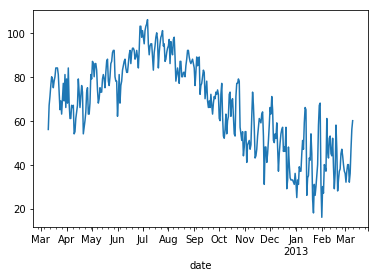

In [95]:
data.max_temp.plot();

In [ ]:
# pandas and matplotlib are working together to plot this. thats how we get the axis?

That one line of code did a **lot** for us. First, it created a nice looking line plot using the maximum temperature column from our DataFrame. Second, because we used `datetime` objects in our index, pandas labeled the x-axis appropriately.

Pandas is smart too. If we're only looking at a couple of days, the x-axis looks different:

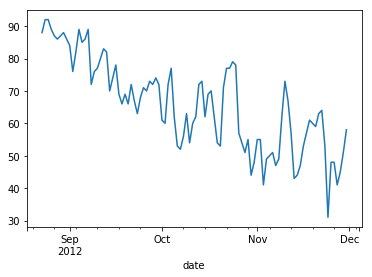

In [99]:
#barrows from unix, make little peices of software that do something fast. 
# what this does is away for you to grab something in the mid, how to pipe or build up
# you are just selecting the middle rows of data
#get data from Sept- Dec

data.max_temp.tail(200).head(100).plot();

In [96]:
data.max_temp.tail()

date
2013-03-06    32
2013-03-07    36
2013-03-08    47
2013-03-09    56
2013-03-10    60
Name: max_temp, dtype: int64

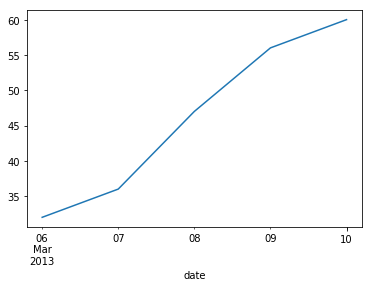

In [97]:
data.max_temp.tail().plot()

Prefer a bar plot? Pandas has got your covered.

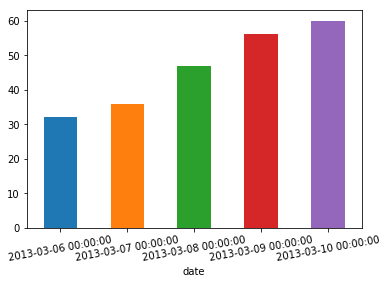

In [101]:
data.max_temp.tail().plot(kind="bar", rot=10);

In [100]:
# can take the tail info and change the type of plot to a bar plot and 
# rot makes the tiles of the bars rotate at that angle so if we don't add rot then
# the titles are verticle
# tail () defult is 5 values
# see different kinds of plots do data.plot? 

The `plot()` function returns a matplotlib `AxesSubPlot` object. You can pass this object into subsequent calls to `plot()` in order to compose plots.

Although `plot()` takes a variety of parameters to customize your plot, users familiar with matplotlib will feel right at home with the `AxesSubPlot` object.

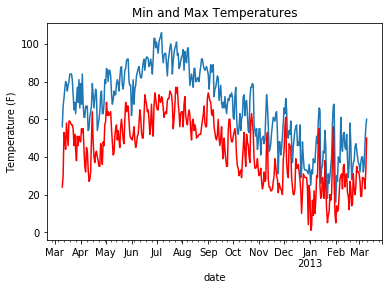

In [104]:
ax1 = data.max_temp.plot(title="Min and Max Temperatures")
data.min_temp.plot(style="red", ax=ax1)
ax1.set_ylabel("Temperature (F)");

## Exercise 7:

Add the mean temperature to the previous plot using a green line. Also, add a legend with the `legend()` method of `ax`.

## Getting Data Out

Writing data out in pandas is as easy as getting data in. To save our DataFrame out to a new csv file, we can just do this:

In [116]:
#this is how we can save the data
data.to_csv("/home/melissaa/Desktop/weather-mod.csv")
#data.to_csv("data/weather-mod.csv")
#data.to_csv("/Users/squiresrb/Documents/BCBB/Seminars/2016/Intro to Data Analysis/weather-mod.csv")

Want to make that tab separated instead? No problem.

In [117]:
data.to_csv("/home/melissaa/Desktop/weather-mod.tsv", sep="\t")

In [ ]:
# ^ save a tab deliminated file

There's also support for [reading and writing Excel files](http://pandas.pydata.org/pandas-docs/stable/io.html#excel-files), if you need it.

## Reading Excel Files

The read_excel() method can read Excel 2003 (.xls) and Excel 2007 (.xlsx) files using the xlrd Python module and use the same parsing code as the above to convert tabular data into a DataFrame. See the cookbook for some advanced strategies

Besides read_excel you can also read Excel files using the ExcelFile class. The following two commands are equivalent:

In [ ]:
#excel files are formated differently than csv files
#there can be multiple sheets so we just have to tell it which sheets to read
# using the read_excel function
pandas.read_excel('data/gapminder_life_expectancy_at_birth.xlsx', 0, index_col=None, na_values=[''])
# the file, tabe to ope, index, empty string

In [ ]:
# Using the sheet name:
# mock_dataframe = pandas.read_excel('data/mock_data.xls', 'Sheet1', index_col=None, na_values=['NA'])

# Using the sheet index:
pandas.read_excel('data/gapminder_life_expectancy_at_birth.xlsx', 0, index_col=None, na_values=['NA'])

# Using all default values:
pandas.read_excel('data/gapminder_life_expectancy_at_birth.xlsx')

#you can save it as excel: data.to_ click tab and you can pick which one

In [118]:
# ignore this was suppose to be in the section above
!head /home/melissaa/Desktop/weather-mod.tsv

date	max_temp	mean_temp	min_temp	max_dew	mean_dew	min_dew	max_humidity	mean_humidity	min_humidity	max_pressure	mean_pressure	min_pressure	max_visibilty	mean_visibility	min_visibility	max_wind	mean_wind	min_wind	precipitation	cloud_cover	events	wind_dir	rain	thunderstorm	fog	snow
2012-03-10	56	40	24	24	20	16	74	50	26	30.53	30.45	30.34	10	10	10	13	6	17.0	0.0	0		138	False	False	False	False
2012-03-11	67	49	30	43	31	24	78	53	28	30.37	30.27	30.13	10	10	10	22	7	32.0	1e-10	1	Rain	163	True	False	False	False
2012-03-12	71	62	53	59	55	43	90	76	61	30.13	29.99	29.88	10	10	6	24	14	36.0	0.03	6	Rain	190	True	False	False	False
2012-03-13	76	63	50	57	53	47	93	66	38	30.12	30.06	29.97	10	10	4	16	5	24.0	0.0	0		242	False	False	False	False
2012-03-14	80	62	44	58	52	43	93	68	42	30.15	30.1	30.04	10	10	10	16	6	22.0	0.0	0		202	False	False	False	False
2012-03-15	79	69	58	61	58	53	90	69	48	30.13	30.08	30.02	10	10	10	31	10	41.0	0.04	3	Rain-Thunderstorm	209	True	True	False	False
2012-03-16	75	64	52	57	54	51	100	75	

## Miscellanea

We've only covered a small fraction of the pandas library here.
Before I wrap up, however, there are a few miscellaneous tips I'd like to go over.

First, it can be confusing to know when an operation will modify a DataFrame and when it will return a copy to you.
Pandas behavior here is entirely dictated by NumPy, and some situations are unintuitive.

For example, what do you think will happen here?

In [ ]:
for idx, row in data.iterrows():
    row["max_temp"] = 0
data.max_temp.head()

Contrary to what you might expect, modifying `row` did **not** modify `data`!
This is because `row` is a copy, and does not point back to the original DataFrame.

Here's the right way to do it:

In [ ]:
for idx, row in data.iterrows():
    data.max_temp.loc[idx] = 0
any(data.max_temp != 0)  # Any rows with max_temp not equal to zero?

When using `apply()`, the default behavior is to go over columns.

In [ ]:
data.apply(lambda c: c.name)

You can make `apply()` go over rows by passing `axis=1`

In [ ]:
data['pressure_diff'] = data.apply(lambda r: r["max_pressure"] - r["min_pressure"], axis=1)

When you call `drop()`, though, it's flipped. To drop a column, you need to pass `axis=1`

In [ ]:
data.drop("events", axis=1).columns

Resources

- [Learn Pandas](https://bitbucket.org/hrojas/learn-pandas)
- [Compute](http://nbviewer.ipython.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/Cookbook%20-%20Compute.ipynb)
- [Merge](http://nbviewer.ipython.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/Cookbook%20-%20Merge.ipynb)
- [Select](http://nbviewer.ipython.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/Cookbook%20-%20Select.ipynb)
- [Sort](http://nbviewer.ipython.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/Cookbook%20-%20Sort.ipynb)


- [Intro to Pandas](https://bitbucket.org/hrojas/learn-pandas)
- [Timeseries](http://nbviewer.ipython.org/github/changhiskhan/talks/blob/master/pydata2012/pandas_timeseries.ipynb)
- [Statistics in Python](http://www.randalolson.com/2012/08/06/statistical-analysis-made-easy-in-python/)

http://datacommunitydc.org/blog/2013/07/python-for-data-analysis-the-landscape-of-tutorials/

## Questions and Answers?

My email address: burkesquires at gmail.com